In [1]:
import time
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install openpyxl
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install geneal
import numpy as np
import pandas as pd
from geneal.genetic_algorithms import ContinuousGenAlgSolver
flowdata = pd.read_excel(r'./flowdata_2017.xlsx', sheet_name='Scenario1')
d2 = pd.read_excel(r'./flowdata_2017.xlsx', sheet_name='Scenario2')
d3 = pd.read_excel(r'./flowdata_2017.xlsx', sheet_name='Scenario3')
d4 = pd.read_excel(r'./flowdata_2017.xlsx', sheet_name='Scenario5')
flowdata = flowdata.append(d2, ignore_index=True)
flowdata = flowdata.append(d3, ignore_index=True)
flowdata = flowdata.append(d4, ignore_index=True)
flowdata = flowdata[['KTB', 'KTC', 'SKB', 'SKC']] # ensure columns ordering is correct

**Equation**:
$$w\times KTB+x\times KTC-y\times SKB-z\times SKC = m = KTB + KTC - SKB - SKC$$

where *m* is the observed mismatch between JRWW and SKL
- Each set of flow values observed for KTB, KTC, SKB, SKC can be geometrically represented as a line in 4-dimensional space mapped by w, x, y, z

$$w\times KTB+x\times KTC-y\times SKB-z\times SKC-(KTB + KTC - SKB - SKC)=0$$

- By iterating through *test_values* for w, x, y, z, we find the point (w,x,y,z) that minimises the mean distance between (w,x,y,z) and all the lines

$$\sum distance = \sum\frac{|w\times KTB+x\times KTC-y\times SKB-z\times SKC-(KTB + KTC - SKB - SKC)|}{\sqrt{KTB^2+KTC^2+SKB^2+SKC^2}}$$

- Find *num_results* number of sample points that provide the *num_results* lowest mean distances
- Each of w, x, y, z is equal to $\frac{E}{1+E}$ where E is the actual flowmeter error

In [2]:
flowdata

,KTB,KTC,SKB,SKC
0,0,409.410,57.790000,345.670000
1,0,412.192,75.600000,332.480000
2,0,417.237,39.808041,374.250000
3,0,417.011,56.437813,347.950000
4,0,429.630,56.110000,364.150000
5,0,58.486,6.240000,51.300000
6,0,247.890,27.364723,210.177307
7,0,428.221,55.161606,337.032990
8,0,444.800,43.934315,284.299530
9,0,434.600,38.140000,339.730000


In [3]:
# prepare raw data
flowdata_temp = flowdata
# change the sign of SKB and SKC columns for simpler arithmetic
flowdata_temp['SKB'] *= -1
flowdata_temp['SKC'] *= -1
flowdata_array = flowdata_temp.to_numpy()

The following genetic algorithm attempts to find the best values of flowmeter errors E1, E2, E3, E4 that minimise the mean euclidean distance between the final solution point and the lines formed by all the data provided.

Iteration: 100
Best fitness: -0.01648009346363404
Iteration: 200
Best fitness: -0.016478094661929295
Iteration: 300
Best fitness: -0.016432326041687092
Iteration: 400
Best fitness: -0.01643048982334151
Iteration: 500
Best fitness: -0.01642768456827075
Iteration: 600
Best fitness: -0.01642768456827075
Iteration: 700
Best fitness: -0.01642768456827075
Iteration: 800
Best fitness: -0.016422912843835336
Iteration: 900
Best fitness: -0.01642130334748387
Iteration: 1000
Best fitness: -0.016418755644968797


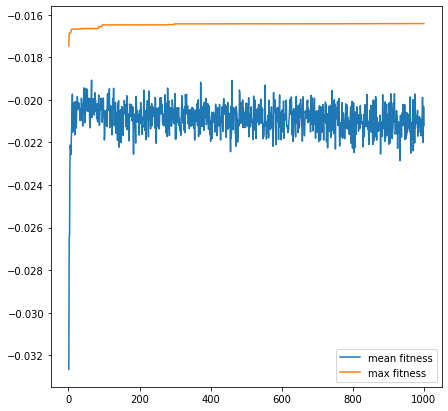


#############################
#			STATS			#
#############################


Total running time: 2 minutes, 51 seconds


Population size: 100
Number variables: 4
Selection rate: 0.5
Mutation rate: 0.15
Number Generations: 1000

Best fitness: -0.016418755644968797
Best individual: [0.98312963 3.70475453 3.95332322 0.91400995]
Wall time: 2min 51s


In [4]:
%%time

# genetic algorithm
def flow_fitness_function(data):
    def calc_dist(errors):
        mean_dist = 0
        #convert errors into variables (w,x,y,z)
        wxyz = np.array(list(map(lambda t:(0.01*t/(1+0.01*t)), errors)))
        for params in data:
            m = sum(params) # mismatch
            dist = abs(np.dot(params, wxyz) - m)/np.linalg.norm(params)
            mean_dist += dist
        mean_dist /= len(data)
        return -mean_dist #inverse because GA maximises the function
    return calc_dist

solver = ContinuousGenAlgSolver(
    n_genes = 4,
    fitness_function = flow_fitness_function(flowdata_array),
    variables_limits = (-4,4)
)

solver.solve()

Iteration: 100
Best fitness: -0.016510471722069268
Iteration: 200
Best fitness: -0.016501166344786246
Iteration: 300
Best fitness: -0.0164933002519105
Iteration: 400
Best fitness: -0.01649329946446804
Iteration: 500
Best fitness: -0.01649329946446804
Iteration: 600
Best fitness: -0.01646761833370608
Iteration: 700
Best fitness: -0.01646761833370608
Iteration: 800
Best fitness: -0.01646761833370608
Iteration: 900
Best fitness: -0.016417818547131372
Iteration: 1000
Best fitness: -0.01641781674391332


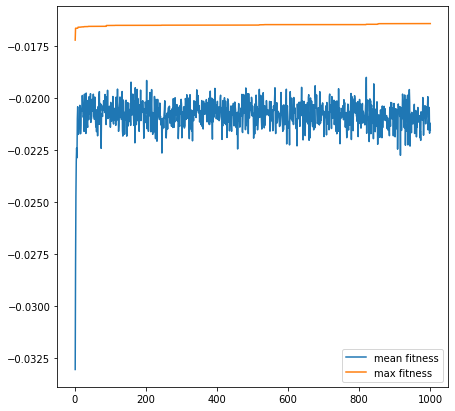


#############################
#			STATS			#
#############################


Total running time: 2 minutes, 20 seconds


Population size: 100
Number variables: 4
Selection rate: 0.5
Mutation rate: 0.15
Number Generations: 1000

Best fitness: -0.01641781674391332
Best individual: [0.82043949 3.92986323 3.89748771 0.98316932]


In [5]:
solver.solve()

Iteration: 100
Best fitness: -0.016492306690624462
Iteration: 200
Best fitness: -0.016492272055232102
Iteration: 300
Best fitness: -0.016468133990694703
Iteration: 400
Best fitness: -0.016448249725045577
Iteration: 500
Best fitness: -0.01644724765954708
Iteration: 600
Best fitness: -0.0164396114705479
Iteration: 700
Best fitness: -0.01643956906683001
Iteration: 800
Best fitness: -0.01643956896664598
Iteration: 900
Best fitness: -0.01643956896664598
Iteration: 1000
Best fitness: -0.01643956896664598


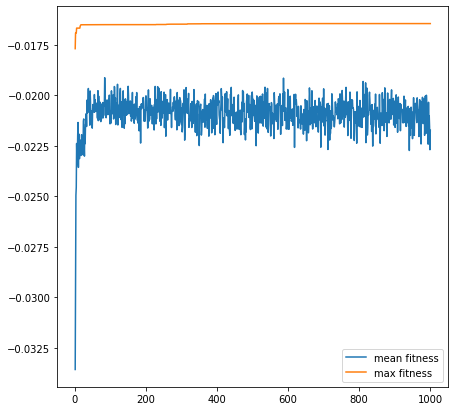


#############################
#			STATS			#
#############################


Total running time: 2 minutes, 21 seconds


Population size: 100
Number variables: 4
Selection rate: 0.5
Mutation rate: 0.15
Number Generations: 1000

Best fitness: -0.01643956896664598
Best individual: [0.78727547 3.5358248  3.95710419 0.49951793]


In [6]:
solver.solve()